# TP1

In [39]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

# Image niveau de gris, pas de padding, masque 3*3

In [40]:
def convolution(image, kernel):
    width, height = image.size
    image_grise = image.convert('L')
    image_conv = Image.new('L', (width, height))

    for x in range(1, width - 1):  
        for y in range(1, height - 1):  
            somme = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    val = image_grise.getpixel((x + k, y + l))
                    somme += val * kernel[k + 1][l + 1]
            somme = min(max(int(somme), 0), 255)
            image_conv.putpixel((x, y), somme)

    return image_conv

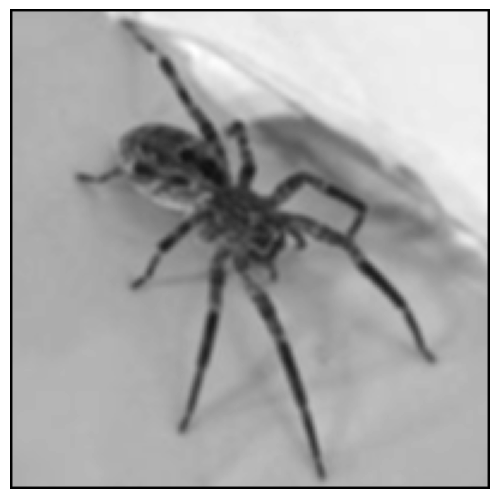

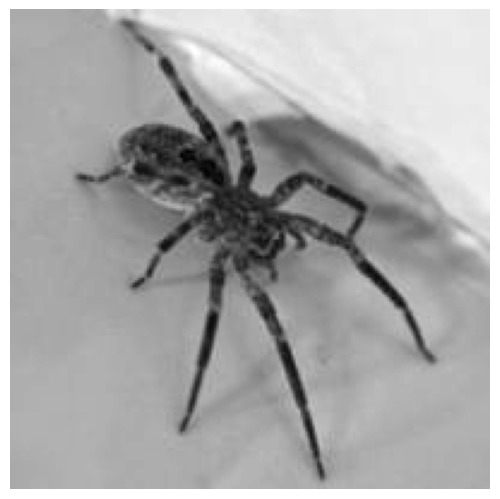

In [41]:
chemin_image_ref = 'spider.png'
image_ref = Image.open(chemin_image_ref)

chemin_image = 'spider.png'
image = Image.open(chemin_image)

kernel_blur = [[1/9, 1/9, 1/9],
               [1/9, 1/9, 1/9],
               [1/9, 1/9, 1/9]]

image_convolutee = convolution(image, kernel_blur)

fig, ax = plt.subplots()
ax.imshow(image, aspect='auto')
ax.axis('off')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(image_convolutee, cmap='gray')

fig, ax = plt.subplots()
ax.imshow(image, aspect='auto')
ax.axis('off')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.imshow(image_ref, cmap='gray')


# Images RBG, padding, masque m*m (impair)

In [42]:
import numpy as np
from PIL import Image

def ajouter_padding(image, padding):
    return np.pad(image, [(padding, padding), (padding, padding), (0, 0)], mode='constant', constant_values=0)

def appliquer_filtre(region, filtre):
    return np.sum(region * filtre[:, :, np.newaxis], axis=(0, 1))

def convolution_rgb(image, filtre):
    if filtre.shape[0] % 2 == 0 or filtre.shape[1] % 2 == 0:
        raise ValueError("La taille du filtre doit être impaire.")

    padding = filtre.shape[0] // 2
    image_pad = ajouter_padding(image, padding)
    image_sortie = np.zeros_like(image)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            region = image_pad[y:y+filtre.shape[0], x:x+filtre.shape[1], :]
            image_sortie[y, x, :] = appliquer_filtre(region, filtre)

    image_sortie = np.clip(image_sortie, 0, 255)
    return image_sortie

# Charger l'image et appliquer la convolution
chemin_image = 'cat.png'
image_pil = Image.open(chemin_image).convert('RGB')  # Convertit l'image en RGB
image_rgb = np.array(image_pil)

filtre = np.ones((11, 11)) / 121  # Filtre de flou

image_convoluee = convolution_rgb(image_rgb, filtre)
image_resultante = Image.fromarray(image_convoluee.astype('uint8'))
image_resultante.show()


In [43]:
chemin_image_ref = 'cat.png'
image_ref = Image.open(chemin_image_ref)

chemin_image = 'cat.png'
image = Image.open(chemin_image)

kernel = [
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121],
    [1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121, 1/121]
]


image_convolutee = convolution_rgb(image, kernel)

# fig, ax = plt.subplots()
# ax.imshow(image, aspect='auto')
# ax.axis('off')
# fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
# plt.imshow(image_convolutee)

# fig, ax = plt.subplots()
# ax.imshow(image, aspect='auto')
# ax.axis('off')
# fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
# plt.imshow(image_ref)

# plt.imshow(image_convolutee)
image_convolutee.show()

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
image_ref.show()